# Rodrigo Mendoza Rodriguez Practica word vectors

In [1]:
def get_texts_from_file(path_corpus, path_truth):

    tr_txt = [] # Aqui van los twits
    tr_y = [] # Aqui van las etiquetas

    with open(path_corpus, 'r', encoding='utf-8') as f_corpus, open(path_truth , 'r', encoding='utf-8') as f_truth:
        
        for twitt in f_corpus:
            tr_txt += [twitt]
            
        for label in f_truth:
            tr_y += [label]
    
    return tr_txt,tr_y        

In [2]:
from pathlib import Path
base  = Path.cwd().parent
path_corpus = base / 'Datos y Scripts-20250828' / 'mex20_train.txt'
path_truth = base / 'Datos y Scripts-20250828' / 'mex20_train_labels.txt'
tr_txt, tr_y = get_texts_from_file(path_corpus,path_truth)

In [3]:
print(len(tr_y))
len(tr_txt)

5278


5278

In [4]:
tr_y

['1\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',


In [5]:
import matplotlib.pyplot as plt

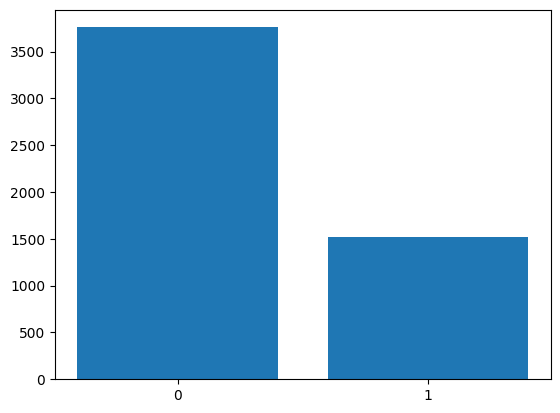

0: 3759
1: 1519


In [6]:
# Ver los datos saber si es balanceado o desbalanceado
count_0 = 0
count_1 = 0

for label in tr_y:
    label = label.strip()
    if label == '0':
        count_0 += 1
    elif label == '1':
        count_1 += 1

plt.bar(['0','1'],[count_0,count_1])
plt.show()

print(f"0: {count_0}")
print(f"1: {count_1}")

In [7]:
tr_txt[61].split()

['🤣🤣🤣',
 'mi',
 'vida,',
 'eres',
 'la',
 'mejor!',
 'Dí',
 'lo',
 'q',
 'digas',
 'y',
 'a',
 'la',
 'verga',
 'los',
 'haters',
 'heteropatriarcanormados!',
 'Block',
 'y',
 'be',
 'happy!',
 '😘']

In [8]:
import nltk

In [9]:
twitt = tr_txt[61]
token = nltk.word_tokenize(twitt)
token

['🤣🤣🤣',
 'mi',
 'vida',
 ',',
 'eres',
 'la',
 'mejor',
 '!',
 'Dí',
 'lo',
 'q',
 'digas',
 'y',
 'a',
 'la',
 'verga',
 'los',
 'haters',
 'heteropatriarcanormados',
 '!',
 'Block',
 'y',
 'be',
 'happy',
 '!',
 '😘']

In [10]:
from nltk.tokenize import TweetTokenizer

In [11]:
tokenizer = TweetTokenizer()

In [12]:
tokenizer.tokenize(twitt)

['🤣',
 '🤣',
 '🤣',
 'mi',
 'vida',
 ',',
 'eres',
 'la',
 'mejor',
 '!',
 'Dí',
 'lo',
 'q',
 'digas',
 'y',
 'a',
 'la',
 'verga',
 'los',
 'haters',
 'heteropatriarcanormados',
 '!',
 'Block',
 'y',
 'be',
 'happy',
 '!',
 '😘']

In [13]:
corpus_de_palabras = []

for doc in tr_txt:
    corpus_de_palabras += tokenizer.tokenize(doc)
    
fdist = nltk.FreqDist(corpus_de_palabras)

In [14]:
# Que ponga la frecuencia en lugar de binario
import numpy as np
def built_bow_tr(tr_txt, vocabulario, dict_indices):
    # Objetivo: Construir la matriz de bow
    bow = np.zeros((len(tr_txt), len(vocabulario)), dtype=int)
    cont_doc = 0
    # Rellenar la matriz, cada renglon es un twitt y cada renglon una palabra
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr.lower()))
        for word in fdist_doc:
            if word in dict_indices:
                bow[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc +=1
    return bow
    

In [15]:
def sortFreqDist(freqDist):
    aux = [(freqDist[key], key) for key in freqDist]
    aux.sort()
    aux.reverse()
    return aux
V = sortFreqDist(fdist) # [frecuencia, palabra]
V = V[:5000]
V


[(3016, ','),
 (2915, 'de'),
 (2829, 'que'),
 (2604, '.'),
 (2031, 'la'),
 (1956, 'a'),
 (1856, 'y'),
 (1435, '!'),
 (1430, 'no'),
 (1399, '@USUARIO'),
 (1198, 'me'),
 (1043, 'el'),
 (1018, 'en'),
 (851, 'se'),
 (736, 'es'),
 (706, 'con'),
 (704, '?'),
 (691, 'verga'),
 (683, 'los'),
 (665, 'madre'),
 (612, 'por'),
 (601, 'las'),
 (590, '"'),
 (582, 'un'),
 (550, 'te'),
 (547, 'mi'),
 (509, 'lo'),
 (493, 'putas'),
 (472, 'una'),
 (464, '...'),
 (462, 'putos'),
 (458, 'para'),
 (434, '😂'),
 (422, 'si'),
 (420, 'ya'),
 (416, 'como'),
 (403, 'su'),
 (377, 'pero'),
 (365, 'tu'),
 (357, 'loca'),
 (350, 'le'),
 (325, 'más'),
 (318, 'No'),
 (298, 'del'),
 (294, 'gorda'),
 (284, 'al'),
 (252, 'bien'),
 (249, 'A'),
 (243, '¿'),
 (242, 'Y'),
 (229, 'son'),
 (229, 'Me'),
 (227, 'o'),
 (225, 'feas'),
 (225, 'cuando'),
 (214, 'Que'),
 (208, ':'),
 (205, 'yo'),
 (199, 'les'),
 (196, 'porque'),
 (191, 'ni'),
 (191, 'está'),
 (189, 'ser'),
 (184, 'estoy'),
 (181, 'sus'),
 (172, 'todos'),
 (169, 'esta'

In [16]:
dict_indices = dict()

cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

In [17]:
bow_tr = built_bow_tr(tr_txt, V, dict_indices)
bow_tr

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], shape=(5278, 5000))

In [18]:
bow_tr.shape

(5278, 5000)

# Compute Document Ocurrence Representation

In [19]:
def compute_dor_rorro(bow):
    dor = []
    Nk = np.count_nonzero(bow > 0, axis=0)
    Nk[Nk == 0] = 1
    for reglon in bow:
        txt_tweet = []
        for count in bow:
            txt_tweet.append(count*np.log(len(bow)/Nk[count]))
        dor.append(txt_tweet)
    return txt_tweet

In [20]:
def compute_dor(TR):
  shapes=TR.shape
  DTR=np.zeros((shapes[1], shapes[0]), dtype=np.float64)
  tam_V=TR.shape[1]

  for doc, i in zip(TR, range(len(TR))): #Iterar por cada documento
    non_zero_positions=np.nonzero(doc)[0] #Numeros de las dimensiones de las palabras contenidas en el tweet
    tam_v=len(non_zero_positions)
    for term in non_zero_positions:
      DTR[term, i] = np.log10(1+doc[term])*np.log10(tam_V/tam_v)
  return DTR


In [21]:
DOR_base = compute_dor(bow_tr)
DOR_base.shape

(5000, 5278)

# Normalizacion L2

In [22]:
from sklearn import preprocessing

preprocessing.normalize(DOR_base, norm='l2')

array([[0.        , 0.        , 0.        , ..., 0.        , 0.02725857,
        0.0176219 ],
       [0.02540038, 0.        , 0.0181985 , ..., 0.01924297, 0.        ,
        0.01743021],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(5000, 5278))

# Feature selection

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

feats = SelectKBest(chi2, k=1000)

feats.fit(bow_tr, tr_y)

SelectKBest(k=1000, score_func=<function chi2 at 0x000001FB5EB22CA0>)

In [24]:
best = feats.get_support(indices=True)
best

array([   0,    1,    2,    4,    5,    6,    7,   10,   11,   12,   13,
         17,   18,   19,   20,   22,   24,   25,   28,   30,   32,   36,
         37,   38,   39,   41,   43,   44,   48,   50,   53,   54,   56,
         57,   58,   59,   61,   63,   64,   65,   66,   67,   69,   70,
         71,   75,   78,   79,   86,   88,   89,   92,   93,   94,   97,
        100,  102,  103,  104,  105,  106,  107,  108,  111,  114,  115,
        116,  117,  119,  120,  122,  123,  124,  128,  129,  131,  133,
        134,  136,  143,  147,  148,  150,  151,  153,  154,  163,  166,
        170,  177,  178,  179,  182,  183,  184,  187,  188,  189,  191,
        196,  198,  200,  209,  211,  217,  221,  222,  225,  230,  231,
        233,  236,  237,  240,  243,  245,  246,  248,  249,  250,  252,
        253,  257,  258,  260,  262,  263,  264,  265,  266,  271,  273,
        279,  281,  284,  285,  289,  291,  294,  295,  298,  299,  301,
        302,  304,  306,  307,  308,  309,  310,  3

In [25]:
dict_indices_alreves = {}
for palabra, indice in dict_indices.items():
    dict_indices_alreves[indice] = palabra
dict_indices_alreves

{0: ',',
 1: 'de',
 2: 'que',
 3: '.',
 4: 'la',
 5: 'a',
 6: 'y',
 7: '!',
 8: 'no',
 9: '@USUARIO',
 10: 'me',
 11: 'el',
 12: 'en',
 13: 'se',
 14: 'es',
 15: 'con',
 16: '?',
 17: 'verga',
 18: 'los',
 19: 'madre',
 20: 'por',
 21: 'las',
 22: '"',
 23: 'un',
 24: 'te',
 25: 'mi',
 26: 'lo',
 27: 'putas',
 28: 'una',
 29: '...',
 30: 'putos',
 31: 'para',
 32: '😂',
 33: 'si',
 34: 'ya',
 35: 'como',
 36: 'su',
 37: 'pero',
 38: 'tu',
 39: 'loca',
 40: 'le',
 41: 'más',
 42: 'No',
 43: 'del',
 44: 'gorda',
 45: 'al',
 46: 'bien',
 47: 'A',
 48: '¿',
 49: 'Y',
 50: 'son',
 51: 'Me',
 52: 'o',
 53: 'feas',
 54: 'cuando',
 55: 'Que',
 56: ':',
 57: 'yo',
 58: 'les',
 59: 'porque',
 60: 'ni',
 61: 'está',
 62: 'ser',
 63: 'estoy',
 64: 'sus',
 65: 'todos',
 66: 'esta',
 67: 'puta',
 68: 'Ya',
 69: 'todo',
 70: 'pinche',
 71: 'puto',
 72: 'tan',
 73: 'Si',
 74: 'La',
 75: 'qué',
 76: '…',
 77: 'eso',
 78: 'muy',
 79: 'soy',
 80: 'hasta',
 81: 'así',
 82: '¡',
 83: '<URL>',
 84: 'mamar',


In [26]:
target_word = [dict_indices_alreves[index] for index in best]
t_words = target_word
t_words

[',',
 'de',
 'que',
 'la',
 'a',
 'y',
 '!',
 'me',
 'el',
 'en',
 'se',
 'verga',
 'los',
 'madre',
 'por',
 '"',
 'te',
 'mi',
 'una',
 'putos',
 '😂',
 'su',
 'pero',
 'tu',
 'loca',
 'más',
 'del',
 'gorda',
 '¿',
 'son',
 'feas',
 'cuando',
 ':',
 'yo',
 'les',
 'porque',
 'está',
 'estoy',
 'sus',
 'todos',
 'esta',
 'puta',
 'todo',
 'pinche',
 'puto',
 'qué',
 'muy',
 'soy',
 'q',
 'mis',
 'joto',
 'cosas',
 '️',
 'vida',
 'mejor',
 'vale',
 'quiero',
 'marica',
 'eres',
 'día',
 'siempre',
 'esa',
 'voy',
 '😭',
 'mierda',
 '-',
 'tengo',
 '(',
 'ese',
 ')',
 'luchona',
 '😍',
 'hdp',
 '“',
 'tienen',
 'pinches',
 'tus',
 'tontas',
 '”',
 'hoy',
 'cagado',
 'tonta',
 'puedo',
 'mas',
 'pendejo',
 'hijo',
 'algo',
 'alguien',
 'cabrona',
 'maricon',
 'vas',
 'mucho',
 '❤',
 'van',
 'sé',
 ';',
 'sí',
 'otra',
 'años',
 'chingada',
 'veces',
 'hijos',
 'mundo',
 '2',
 'días',
 'esos',
 'amor',
 'mamá',
 'tienes',
 'tiempo',
 'cuenta',
 'pendeja',
 'estaba',
 'wey',
 'esto',
 'sien

In [27]:
# dict_indices {palabra : dimension_en_bow}
target_matrix = np.array([DOR_base[dict_indices[word]] for word in t_words])
target_matrix.shape

(1000, 5278)

In [28]:
DOR_base.shape

(5000, 5278)

In [29]:
from sklearn.manifold import TSNE
 
 
reduce_matrix = TSNE(n_components=2).fit_transform(target_matrix)

In [30]:
reduce_matrix

array([[ 13.584076 , -11.039836 ],
       [ 20.240574 ,  -8.879434 ],
       [-20.49011  ,  -9.183914 ],
       ...,
       [  2.9536202,  13.774026 ],
       [ -4.1973   , -15.196471 ],
       [ -0.9977961,  -1.2614465]], shape=(1000, 2), dtype=float32)

In [31]:
max_x , max_y = np.max(reduce_matrix, axis=0)
min_x , min_y = np.min(reduce_matrix, axis=0)


print(f"max_x: {max_x}, max_y: {max_y}")
print(f"min_x: {min_x}, min_y: {min_y}")

max_x: 29.204727172851562, max_y: 26.167285919189453
min_x: -26.352333068847656, min_y: -27.00380516052246


C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128166 

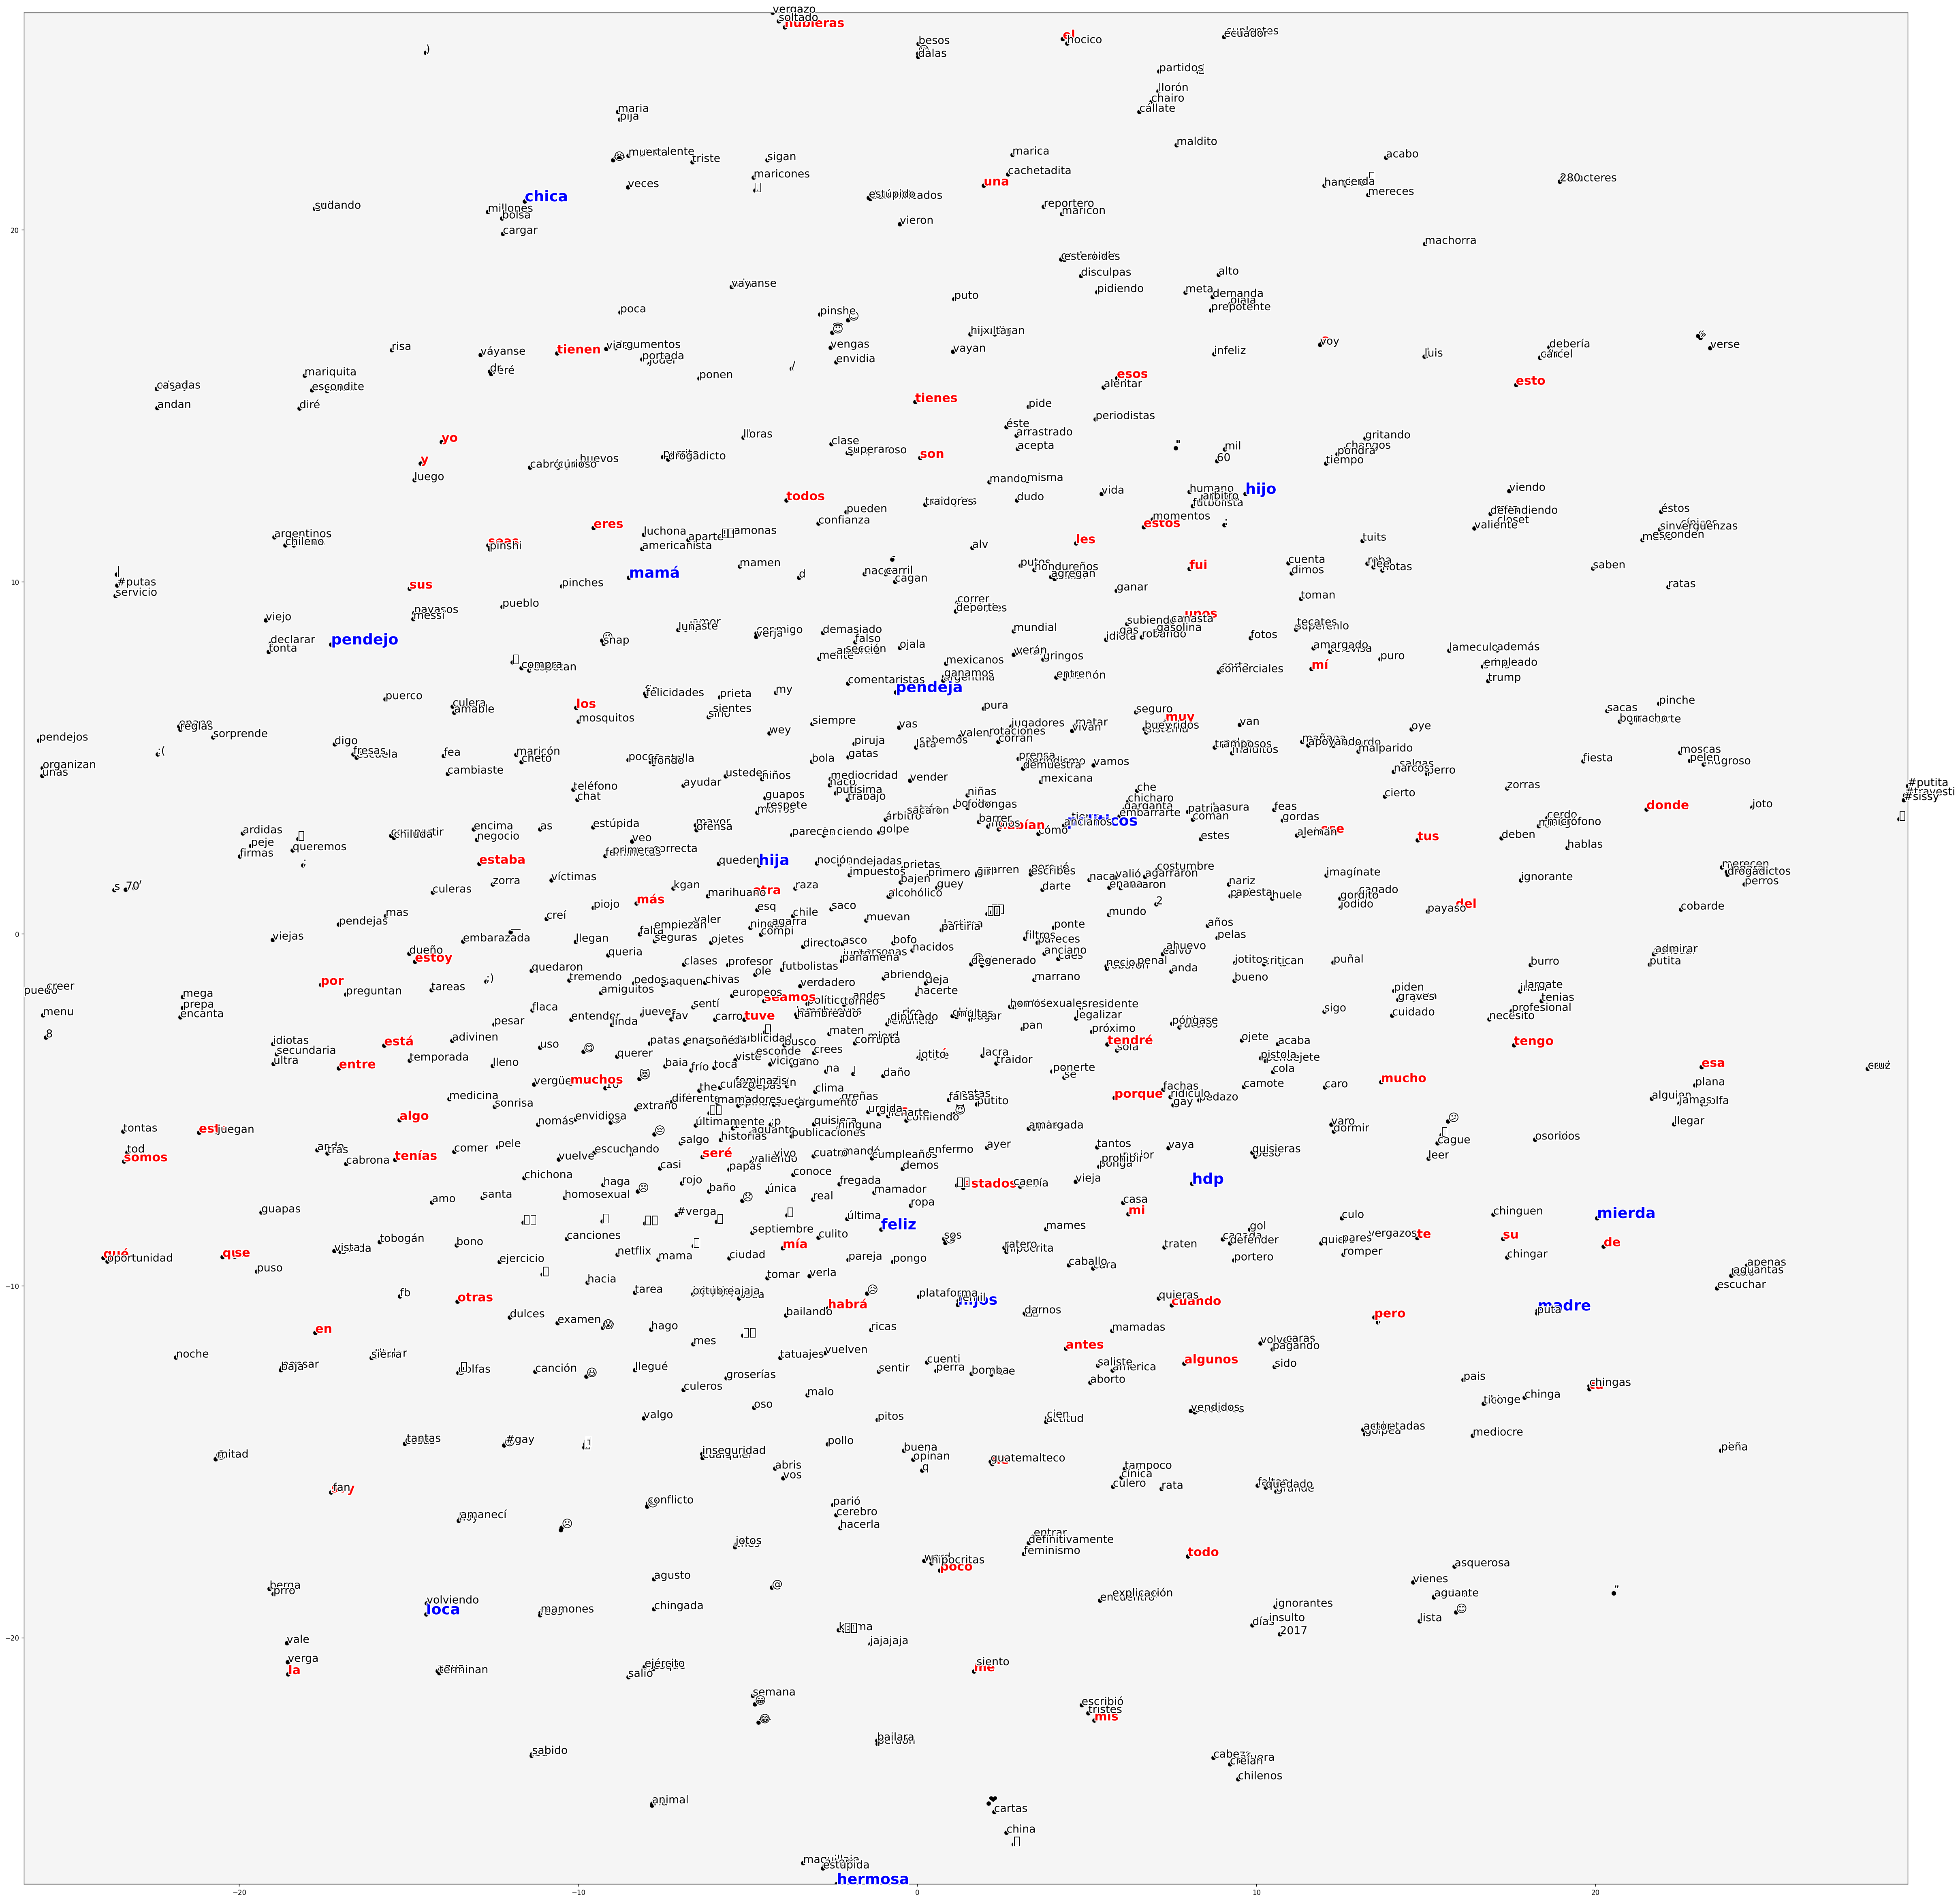

In [32]:
from matplotlib import patheffects
from nltk.corpus import stopwords

x, y = reduce_matrix[:, 0], reduce_matrix[:, 1]

plt.figure(figsize=(50, 50), dpi=120)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.scatter(x, y, s=30, color='black')






sw = stopwords.words('spanish')


for i, word in enumerate(t_words):
    if word in sw:
        plt.annotate(
            word, 
            (x[i], y[i]), 
            fontsize=18, 
            color='red', 
            fontweight='bold',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )
    elif word in ['politicos', 'corrupción', 'PRI', 'feliz', 
              'hermosa', 'chica', 'tu', 'hdp','madre','madres',
              '@usuario' ,'hijos', 'pendeja', 'pendejo','mierda', 
              'loca', 'hijo', 'hija', 'mamá', 'tía']:
        plt.annotate(
            word, 
            (x[i], y[i]), 
            fontsize=22, 
            color='blue', 
            fontweight='bold',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )
    else:
        plt.annotate(
            word, 
            (x[i], y[i]), 
            fontsize=16, 
            color='black',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )

plt.gca().set_facecolor('whitesmoke')
plt.show()



[DEBUG] Palabras a graficar: ['madre', 'tu', 'loca', 'mierda', 'hdp', 'pendejo', 'hijo', 'hijos', 'mamá', 'pendeja', 'hija', 'feliz', 'chica', 'hermosa', 'politicos']
[DEBUG] Coordenadas: [array([ 18.288181, -10.705712], dtype=float32), array([ 19.812887, -12.935968], dtype=float32), array([-14.485944, -19.33794 ], dtype=float32), array([20.044743, -8.078299], dtype=float32), array([ 8.101276 , -7.1064878], dtype=float32), array([-17.287724,   8.218012], dtype=float32), array([ 9.675178, 12.497357], dtype=float32), array([  1.1924412, -10.539104 ], dtype=float32), array([-8.5048065, 10.115623 ], dtype=float32), array([-0.63712955,  6.8635917 ], dtype=float32), array([-4.678151 ,  1.9497458], dtype=float32), array([-1.0706546, -8.4014635], dtype=float32), array([-11.577612,  20.808   ], dtype=float32), array([ -2.375504, -27.003805], dtype=float32), array([4.4062066, 3.0709267], dtype=float32)]


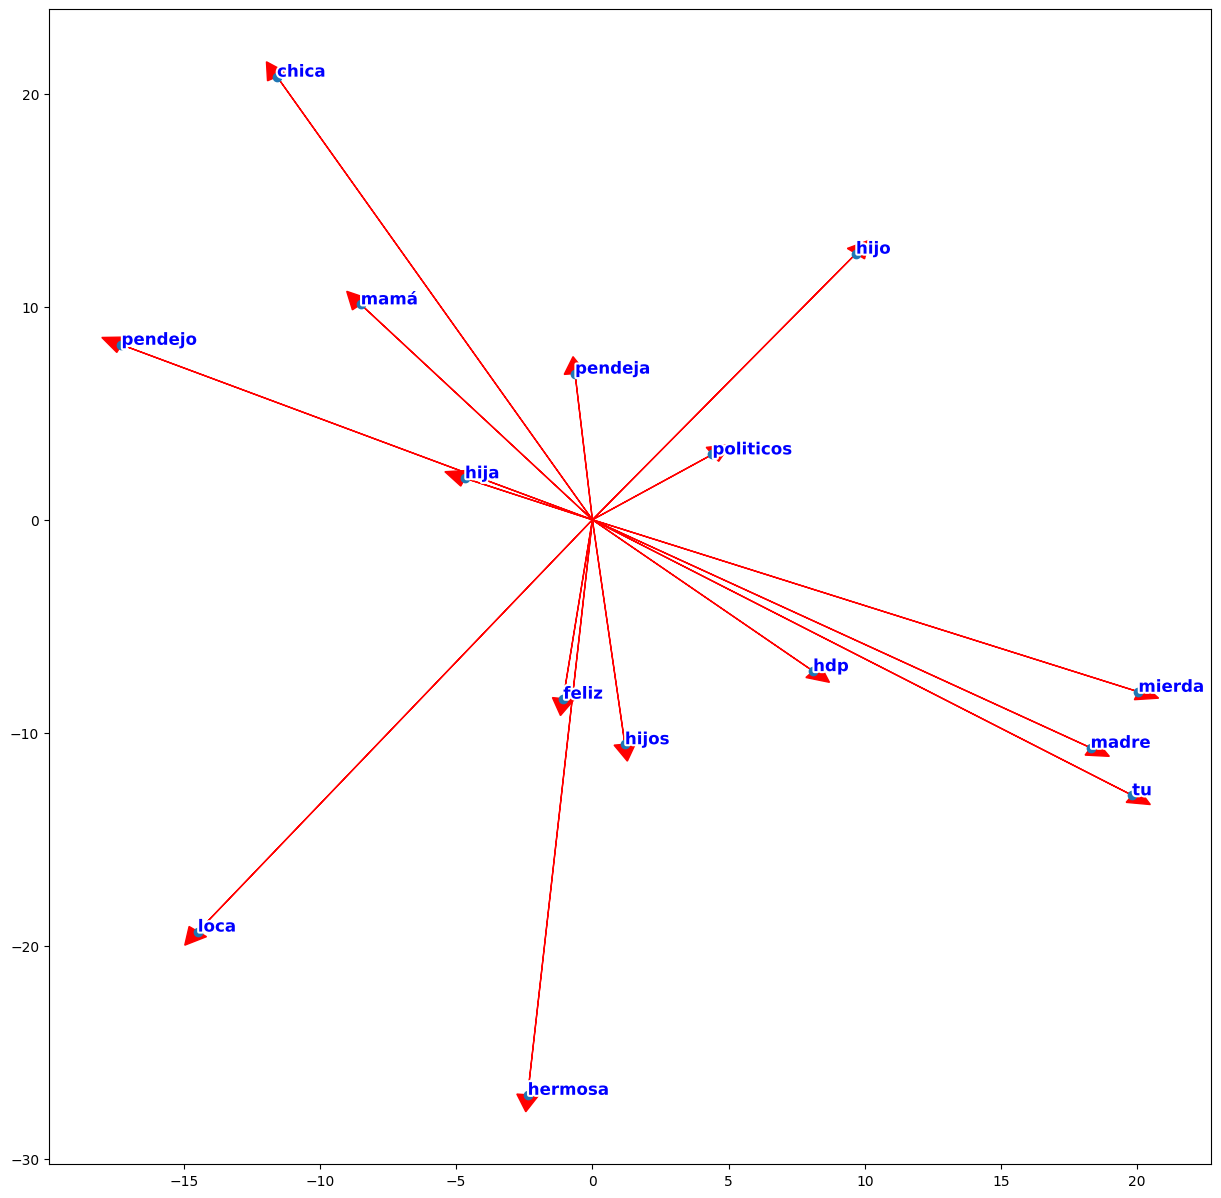

In [33]:
from colorstreak import Logger
subsetword = ['politicos', 'corrupción', 'PRI', 'feliz', 
              'hermosa', 'chica', 'tu', 'hdp','madre','madres',
              '@usuario' ,'hijos', 'pendeja', 'pendejo','mierda', 
              'loca', 'hijo', 'hija', 'mamá', 'tía','padre','papá']

# t_words Las 1,000 mejores palabras según chi2 ( Algoritmo de selección de características)
# reduce_matriz Aquí estan las 1,000 mejores palabras en dos dimensiones

subreduce_matriz = []
ploted_subsetwords = []


for idx, word in enumerate(t_words):
    if word in subsetword:
        subreduce_matriz.append(reduce_matrix[idx])
        ploted_subsetwords.append(word)

print()
Logger.debug(f"Palabras a graficar: {ploted_subsetwords}")
Logger.debug(f"Coordenadas: {subreduce_matriz}")

# Convertir a numpy array
subreduce_matriz = np.array(subreduce_matriz)


# Hacemos la gráfica de flechas
fig , ax = plt.subplots(figsize=(15, 15))

for word in subreduce_matriz:
    ax.arrow(0, 0, word[0], word[1], head_width=0.8, head_length=0.8, fc='red', ec='red', width=0.1e-2)
    ax.annotate(
        ploted_subsetwords[subreduce_matriz.tolist().index(word.tolist())], 
        (word[0], word[1]), 
        fontsize=12, 
        color='blue', 
        fontweight='bold',
        path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
    )

ax.scatter(subreduce_matriz[:,0], subreduce_matriz[:,1])

In [35]:
from wordcloud import WordCloud

In [36]:
from nltk.tokenize import TweetTokenizer
import re
tokenizer = TweetTokenizer()

texto = """La Universidad Iberoamericana (IBERO) es una institución de educación 
superior privada en México, fundada en 1943 y dirigida por la Compañía de Jesús. 
Forma parte de una red de universidades jesuitas presentes en diversos países y 
es considerada una de las instituciones académicas más reconocidas del país. Su 
sede principal se ubica en la Ciudad de México, en la zona de Santa Fe, aunque 
cuenta con campus y extensiones en otras ciudades mexicanas como León, Puebla, 
Tijuana y Torreón. La IBERO se caracteriza por un modelo educativo de inspiración 
cristiana y humanista, que busca la formación integral de sus estudiantes, 
combinando excelencia académica con valores éticos, sociales y culturales. Su 
filosofía educativa se fundamenta en el **humanismo integral** y en la tradición 
jesuita de la **cura personalis**, es decir, la atención personalizada y completa
a cada estudiante en sus dimensiones intelectual, afectiva, ética, espiritual y 
social. Asimismo, promueve el **diálogo interdisciplinar**, la libertad académica
y de conciencia, la apertura al pluralismo y la justicia social. La universidad 
ofrece programas de licenciatura, maestría y doctorado en distintas áreas del 
conocimiento, entre ellas ciencias sociales, humanidades, ingenierías, ciencias 
de la salud, comunicación, artes, arquitectura, derecho, negocios y ciencias 
exactas. Su investigación se orienta hacia los problemas nacionales e internacional
es, con un énfasis en el desarrollo humano, la equidad social y la sustentabilidad.
También impulsa programas de servicio social como parte obligatoria de la formación
, lo que refuerza su compromiso con la transformación social.La IBERO es 
reconocida por su papel en la **difusión cultural**, la vinculación con la 
sociedad y el acompañamiento a movimientos en favor de la paz con justicia, 
la dignidad humana y el desarrollo sostenible. Su lema institucional es **“La 
verdad nos hará libres”**, que refleja su misión de buscar, transmitir y aplicar 
el conocimiento en beneficio del bien común."""

tokens = tokenizer.tokenize(texto.lower())

texto_tokenizado = [word for word in tokens if re.match(r'[a-záéíóúüñ]+', word)] # filtrar las palabras que tenga el abecedario, acentos, dierisis y ñ

fdist_ibero = nltk.FreqDist(texto_tokenizado)





# Crear nube de palabras 

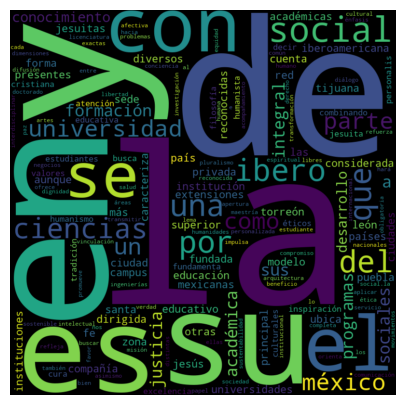

In [37]:
wordcloud = WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(fdist_ibero)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Crear nube de palabras sin stopwords

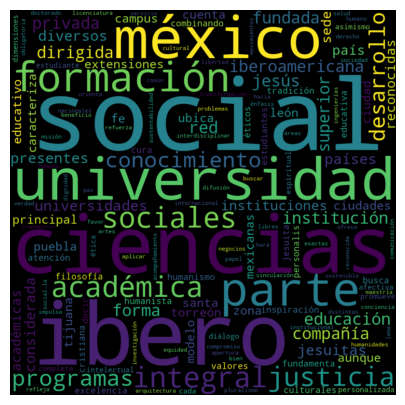

In [38]:
from nltk.corpus import stopwords
sw = stopwords.words('spanish')
texto_tokenizado = [word for word in tokens if re.match(r'[a-záéíóúüñ]+', word) and word not in sw] # filtrar las palabras que tenga el abecedario, acentos, dierisis y ñ

fdist_ibero = nltk.FreqDist(texto_tokenizado)

wordcloud = WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(fdist_ibero)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word clouds sin palabras obvias

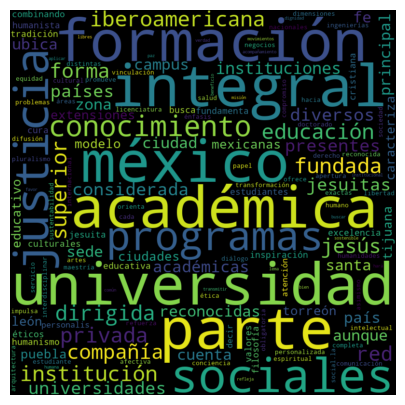

In [39]:
word_to_exclude = ['desarrollo', 'social', 'proyecto', 'investigación', 'nivel', 'tipo', 'ibero', 'ciencias', 'mexico']
sw = stopwords.words('spanish')
texto_tokenizado = [word for word in tokens if re.match(r'[a-záéíóúüñ]+', word) and word not in sw and word not in word_to_exclude] # filtrar las palabras que tenga el abecedario, acentos, dierisis y ñ

fdist_ibero = nltk.FreqDist(texto_tokenizado)

wordcloud = WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(fdist_ibero)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Nube de palabra con 50 palabras mas importantes del dataset de agresividad

In [40]:
chi2_scores = feats.scores_ 
best_scores = chi2_scores[best]

In [41]:
best_scores

array([  3.88391302,  13.8004089 ,   2.94580155,  12.75322961,
        46.77952725,   2.56301765,  59.2469122 , 138.32941578,
         4.39519919,  31.16513   ,   2.66748382,  24.00223476,
        33.23692121,  15.68528246,   2.26619156,  36.89974641,
        12.94850591,  62.55989316,  11.30388828, 171.39595343,
         7.65508256,  33.5026597 ,  12.54041039, 179.859082  ,
       106.404039  ,   2.6754506 ,   5.00491413,   4.07948961,
        16.80930549,  29.20523722,   3.96828498,  12.2452227 ,
        14.4983931 ,  36.6673755 ,   3.77640427,  13.96444233,
        16.16114763,  56.7995841 ,  12.35734143,   3.85458481,
        11.63277971, 117.74826774,   3.64399071, 215.96459656,
        21.79650752,   2.37386491,   3.55248136,  40.27135417,
        24.70732766,  17.64091506,  46.40316741,  28.57898617,
        12.19662671,  12.50198692,   5.33435576,   3.32203265,
        15.7145895 ,   9.89299463,  37.87238396,  16.79305611,
         2.06274833,   5.97806434,   2.1366729 ,  24.93

In [42]:
best_dict = {}
for palabra, indice in dict_indices.items():
    if indice in best[:50]:   
        best_dict[palabra] = chi2_scores[indice]  
top50 = dict(sorted(best_dict.items(), key=lambda x: x[1], reverse=True)[:50])
top50


{'pinche': np.float64(215.96459656160502),
 'tu': np.float64(179.85908200041928),
 'putos': np.float64(171.3959534307819),
 'me': np.float64(138.32941578083933),
 'puta': np.float64(117.74826774467111),
 'loca': np.float64(106.40403899816067),
 'mi': np.float64(62.5598931580029),
 '!': np.float64(59.24691220259117),
 'estoy': np.float64(56.79958410352789),
 'a': np.float64(46.77952724739973),
 'soy': np.float64(40.27135416984445),
 '"': np.float64(36.89974640778297),
 'yo': np.float64(36.66737550309365),
 'su': np.float64(33.502659702155114),
 'los': np.float64(33.23692120836327),
 'en': np.float64(31.16512999599665),
 'son': np.float64(29.205237216910824),
 'q': np.float64(24.70732766251478),
 'verga': np.float64(24.00223475671368),
 'puto': np.float64(21.796507517354442),
 'mis': np.float64(17.640915063970013),
 '¿': np.float64(16.809305491944343),
 'está': np.float64(16.161147630180555),
 'madre': np.float64(15.685282460097882),
 ':': np.float64(14.498393103862554),
 'porque': np.fl

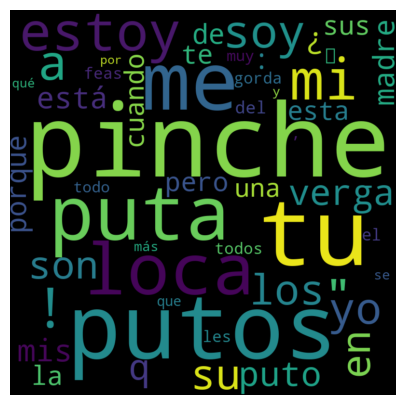

In [43]:
wordcloud = WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(top50)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()